# Executing QIR programs

If you have a QIR string or bitcode, you can start by creating Pulla-compatible circuits representation. You can also generate a QIR string or bitcode from a qiskit circuit using IQM's fork of `qiskit_qir`, available as the package `iqm-qiskit-qir`.

In [22]:
import os
from qiskit import visualization
from qiskit.compiler import transpile
from iqm.qiskit_iqm.iqm_transpilation import optimize_single_qubit_gates
from iqm.pulla.pulla import Pulla
from iqm.pulla.utils_qiskit import station_control_result_to_qiskit
from iqm.pulla.utils_qir import qir_to_pulla
from qiskit_qir import to_qir_module

In [23]:
# Create a Pulla object and a qiskit-iqm backend for accessing the quantum computer.
cocos_url = os.environ['PULLA_COCOS_URL']                      # or set the URL directly here
station_control_url = os.environ['PULLA_STATION_CONTROL_URL']  # or set the URL directly here
p = Pulla(station_control_url)
provider = IQMProvider(cocos_url)
backend = provider.get_backend()
shots = 100

In [ ]:
# Define a quantum circuit.
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.draw(output='mpl')

In [ ]:
# Transpile the circuit using Qiskit
qc_transpiled = transpile(qc, backend=backend, layout_method='sabre', optimization_level=3)
qc_optimized = optimize_single_qubit_gates(qc_transpiled)

#Generate the QIR
module, _ = to_qir_module(circuit)
qir = str(module)

## Executing QIR

[01-17 16:50:24;W] station-control-client version '2.11' is newer minor version than '2.9' used by the station control server, some new client features might not be supported.


[01-17 16:50:24;I] Required number of qubits: 1
[01-17 16:50:24;I] Required number of results: 1
[01-17 16:50:24;I] QIR version: 1.0
[01-17 16:50:26;I] Submitted sweep with ID: db089d02-2656-4d2d-bcf6-283b609d67dd
[01-17 16:50:26;I] Created task in queue with ID: 05486e2b-528f-40e2-a5e0-657567b76242
[01-17 16:50:26;I] Sweep link: http://xld11-s2.xld11.iqm.fi/station/sweeps/db089d02-2656-4d2d-bcf6-283b609d67dd
[01-17 16:50:26;I] Task link: http://xld11-s2.xld11.iqm.fi/station/tasks/05486e2b-528f-40e2-a5e0-657567b76242
[01-17 16:50:26;I] Waiting for the sweep to finish...
SweepStatus.PROGRESS
SweepStatus.SUCCESS
[01-17 16:50:27;I] Sweep status: SweepStatus.SUCCESS
StationControlResult(sweep_id=UUID('db089d02-2656-4d2d-bcf6-283b609d67dd'), task_id=UUID('05486e2b-528f-40e2-a5e0-657567b76242'), status=<TaskStatus.READY: 'READY'>, start_time='2025-01-17T14:50:25.976741+00:00', end_time='2025-01-17T14:50:26.843285+00:00', result=[{'m_1_0_0': [[0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [

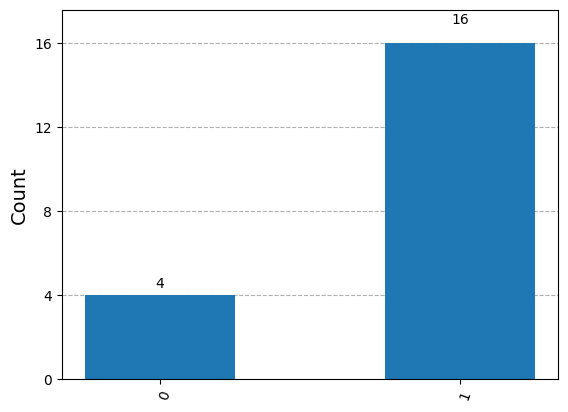

In [26]:
p = Pulla(station_control_url)
circuits, compiler = qir_to_pulla(p, qir)

playlist, context = compiler.compile(circuits)

shots = 20
settings, context = compiler.build_settings(context, shots=shots)
response_data = p.execute(playlist, context, settings, verbose=False)
print(response_data)

qiskit_result = station_control_result_to_qiskit(response_data, shots=shots, execution_options=context['options'])
print(f"Qiskit result counts: {qiskit_result.get_counts()}")
visualization.plot_histogram(qiskit_result.get_counts())